# LogisticRegression with automatic cross-validated optimization

**Example using the logistic_auto function in the EasyMLR module**

The **logistic_auto** function in the EasyMLR module automatically finds the optimum set of cross-validated hyper-parameters and then outputs the fitted regression model and summary statistics using sklearn LogisticRegression with optuna.

This example shows how to check the cross-validation of the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the EasyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [1]:
# !pip install git+https://github.com/gjpelletier/EasyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

In the next step, we will automatically find the best cross-validated hyper-parameters for RandomForestRegressor using optuna. Then we will fit the model using the training data with the best parameters. 

After this training step is completed, proceed to the next step to check how well the predictions from the training data match the predictions using the testing data. 

Running optuna to find best parameters, could take a few minutes, please wait...
Fitting LogisticRegression model with best parameters, please wait ...

LogisticRegression goodness of fit to training data in model_outputs['stats']:

| Statistic          |   LogisticRegression |
|:-------------------|---------------------:|
| mcfadden_pseudo_r2 |            0.985571  |
| accuracy           |            0.998608  |
| f1_score           |            0.998624  |
| precision          |            0.99866   |
| recall             |            0.998591  |
| log_loss           |            0.0332135 |
| n_classes          |           10         |
| n_samples          |         1437         |


Best-fit accuracy of CV test data: 0.9715

Done
Time elapsed: 70.14 sec



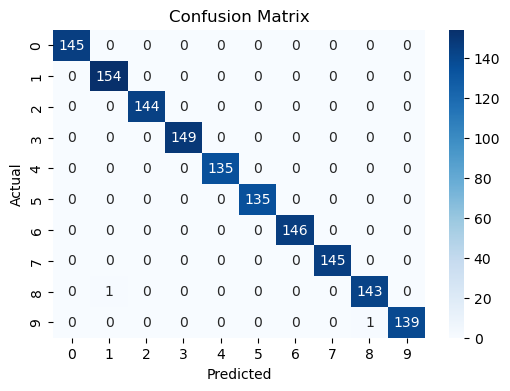

In [4]:
kwargs = {
    # user-specified params
    'random_state': 42,                 # random seed for reproducibility
    'n_trials': 50,                     # number of optuna trials
    # [min,max] model params that are optimized by optuna
    'C': [1e-4, 10],                    # Inverse of regularization strength
    # categorical model params optimized by optuna
    'solver': ['liblinear', 'lbfgs', 'saga'],   # optimization algorithm
    'penalty': ['l1', 'l2'],            # norm of the penalty
    # model extra_params that are optional user-specified
    'max_iter': 500,                    # max iterations for solver
    'n_jobs': -1                        # number of jobs to run in parallel
                                        # -1 to use all CPU cores
}    

from EasyMLR import logistic_auto
train_model, train_output = logistic_auto(X_train, y_train, **kwargs)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. To encode and standardize the testing data we will use the same encoder and scaler that were used to encode and standardize the training data, and the same optimal selected features from the training data, to avoid data leakage between the training and testing data.


LogisticRegression goodness of fit to testing data in results['stats']:

| Statistic          |   LogisticRegression |
|:-------------------|---------------------:|
| mcfadden_pseudo_r2 |             0.956134 |
| accuracy           |             0.972222 |
| f1_score           |             0.974074 |
| precision          |             0.973755 |
| recall             |             0.974743 |
| log_loss           |             0.100407 |
| n_classes          |            10        |
| n_samples          |           360        |



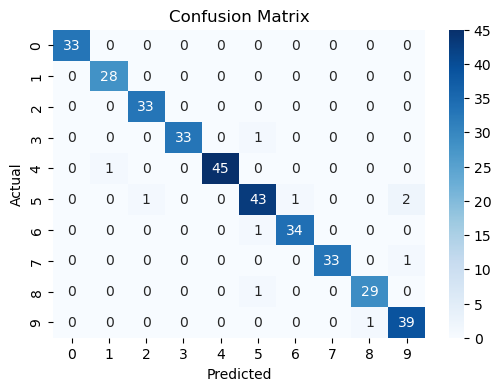

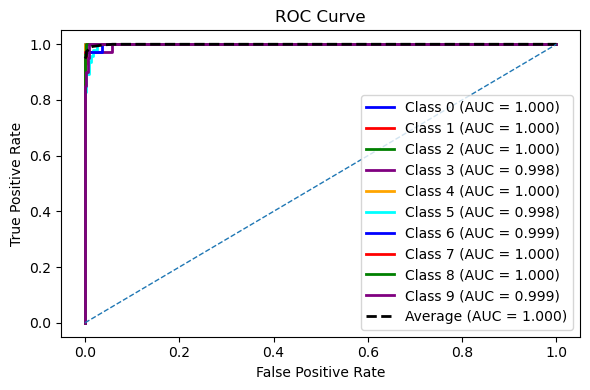

In [5]:
from EasyMLR import plot_logistic_results_test
results = plot_logistic_results_test(train_model, X_test, y_test, 
    encoder= train_output['encoder'], 
    scaler= train_output['scaler'], 
    categorical_cols= train_output['categorical_cols'], 
    continuous_cols= train_output['continuous_cols'], 
    selected_features= train_output['selected_features'])

## Final fit of the model using all of the X and y data

In the next step we will use the best parameters from the training model to fit the model using all of the X and y data.

Fitting LogisticRegression model with best parameters, please wait ...

LogisticRegression goodness of fit to training data in model_outputs['stats']:

| Statistic          |   LogisticRegression |
|:-------------------|---------------------:|
| mcfadden_pseudo_r2 |            0.986361  |
| accuracy           |            0.998331  |
| f1_score           |            0.99832   |
| precision          |            0.998323  |
| recall             |            0.99832   |
| log_loss           |            0.0314042 |
| n_classes          |           10         |
| n_samples          |         1797         |

Done
Time elapsed: 1.98 sec



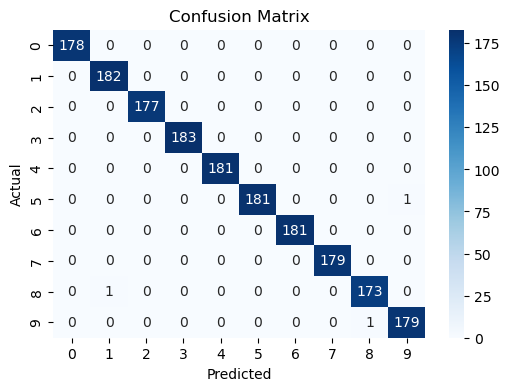

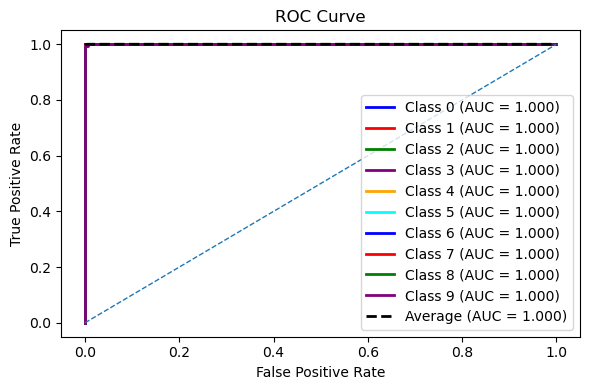

In [7]:
from EasyMLR import logistic
final_model, final_output = logistic(X, y,
    **train_output['best_params'], 
    encoder= train_output['encoder'], 
    scaler= train_output['scaler'], 
    categorical_cols= train_output['categorical_cols'], 
    continuous_cols= train_output['continuous_cols'], 
    selected_features= train_output['selected_features'])

## Display the results of the hyperparameter optimization

The results of the optuna optimization study were saved in the previous step when the model was trained with the training data subset. The output dictionary that we called **train_output** in that step contains a key named **optuna_study** which contains the results of the optimized optuna study. 

In the next step we will use the **show_optuna** function of EasyMLR to display the results of the optimized cross-validated optuna study to show the selected optimum values for the hyperparameters, the optimization history, and the relationships between the hyperparameters and their importance for the scoring criteria.

Best parameters:

num_features: 55
C: 8.974239910876863
solver: lbfgs

Best score: 0.9714769647696478



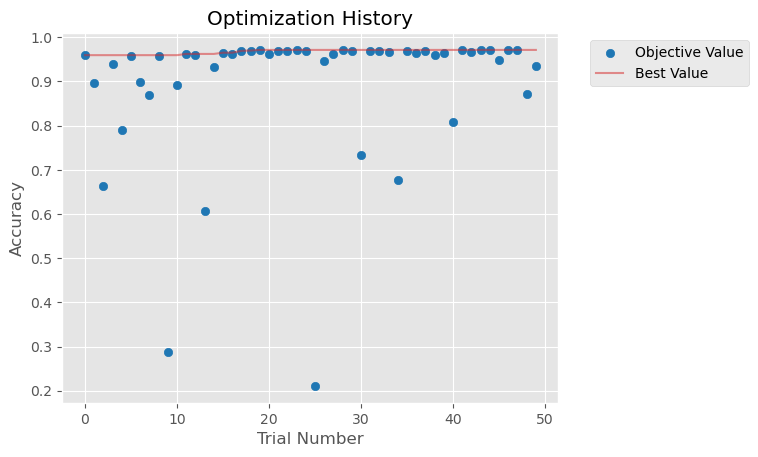

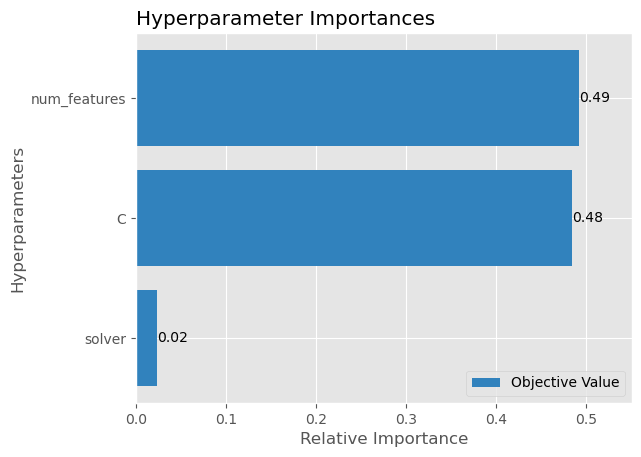

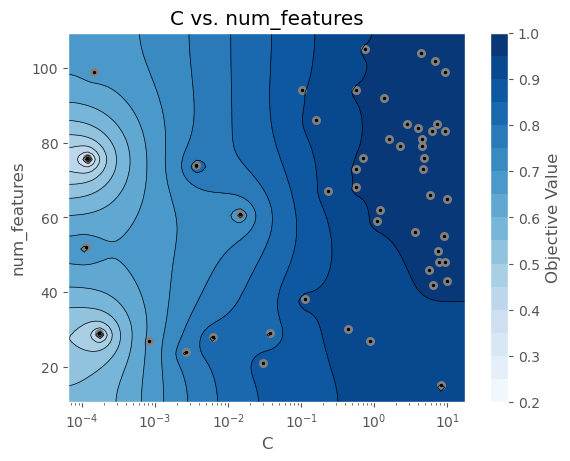

In [8]:
from EasyMLR import show_optuna
show_optuna(train_output['optuna_study'])

## User instructions

In [9]:
help(logistic_auto)

Help on function logistic_auto in module EasyMLR:

logistic_auto(X, y, **kwargs)
    Autocalibration of LogisticRegression hyperparameters
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    15-June-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe or array of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe or array of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        # general params that are user-specified
        n_trials= 50,       # number of optuna trials
        preprocess= True,   # True for OneHotEncoder and MinMaxScaler
        verbose= 'on',      # display summary stats and plots
        gpu= True,          # autodetect gpu if present
        n_splits= 5,        # number of splits for KFold CV
        pruning= False,     # prune poor optuna trials
        thre